# 4. Image processing

Juan Berrios | juanberrios@pitt.edu | Last updated: March 1, 2023

**Summary and overview of the data:**

- In this purpose we continue the work of processing images so their degree of similarity can be used as a measure of task success. I will process the maps completed by participants and then calculate similarity measures between them and the intended map.

# 1. Preparations

In [1]:
#Importing libraries

import glob #for directory-level operations
import pandas as pd #for data frames
import numpy as np #for arrays
import cv2 #for images
from matplotlib import pyplot as plt #Used to display images
from skimage.metrics import structural_similarity as ssim #Similarity measure

#Releasing all output:     

from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

#Turning pretty print off:
%pprint

Pretty printing has been turned OFF


## 2. Explore

In [2]:
#Loading pictures

img1 = cv2.imread("data/images/test/mask.png")    
img2 = cv2.imread("data/images/test/sample_A.png")    

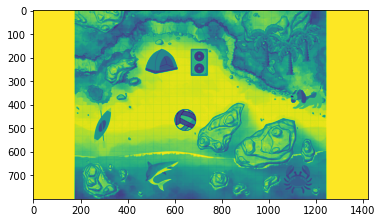

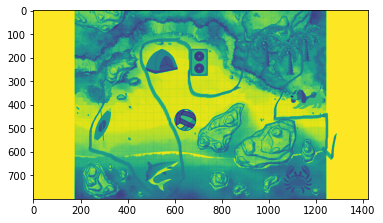

In [3]:
#Turning to grayscale

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Previewing images

plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

- If need be, we can attempt extracting the differences for manual inspection. This can be done by first creating a grayscale mask using the difference we have already calculated above:

In [4]:
#Calculating
diff = cv2.absdiff(img1,img2)

In [5]:
mask = diff

In [6]:
th = 1
imask = mask>1

In [7]:
canvas = np.zeros_like(img1,np.uint8)
canvas[imask] = img1[imask]

- The result will look something like this:

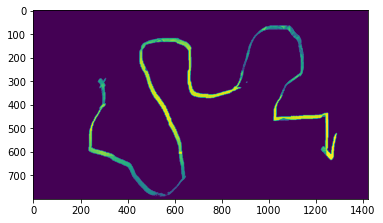

In [8]:
plt.imshow(canvas)
plt.show()

- As a last step we save the output (now that once using an image visualizer, it will show in the grayscale):

In [9]:
cv2.imwrite('data/images/test/result.png',canvas)

True

## 3. Process directories

- We'll first define a master function that will go through all of the steps above and save the output under a new name:

In [10]:
def image_process(fdir, fmask, pattern):
    """Loads image and mask, turns into grayscale, calculates differences and plots difference. The result is saved
    as a .png file. The functioon takes a file directory, a mask file path, and a regex pattern to look for relevant
    files."""
    for fname in glob.glob(fdir + pattern): 
        img = cv2.imread(fname)
        mask_img = cv2.imread(fmask)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
        diff = cv2.absdiff(mask_img,img)
        mask = diff
        th = 1
        imask = mask>1
        canvas = np.zeros_like(mask_img,np.uint8)
        canvas[imask] = mask_img[imask]
        split_name = fname.split('.')
        out_file = split_name[0] + "_out" + "." + split_name[1] 
        cv2.imwrite(out_file,canvas)

- To simplify steps and keep all maps in the same folder, I added the map to the end of the file name and made that match the directory association:

In [11]:
image_process('data/images/maps/drawings/A_1_I/','data/images/maps/masks/A_1_I.png','*.png')
image_process('data/images/maps/drawings/A_1_II/','data/images/maps/masks/A_1_II.png','*.png')
image_process('data/images/maps/drawings/A_2_I/','data/images/maps/masks/A_2_I.png','*.png')
image_process('data/images/maps/drawings/A_2_II/','data/images/maps/masks/A_2_II.png','*.png')
image_process('data/images/maps/drawings/B_1_I/','data/images/maps/masks/B_1_I.png','*.png')
image_process('data/images/maps/drawings/B_1_II/','data/images/maps/masks/B_1_II.png','*.png')
image_process('data/images/maps/drawings/B_2_I/','data/images/maps/masks/B_2_I.png','*.png')
image_process('data/images/maps/drawings/B_2_II/','data/images/maps/masks/B_2_II.png','*.png')

- To examamine that files were actually processed, we can double check the output:

In [12]:
#Build list of files, print file names out for the A_1_I folder:

file_list = glob.glob("data/images/maps/drawings/A_1_I/*.png")

for file in file_list:
    print(file)

data/images/maps/drawings/A_1_I\A2.png
data/images/maps/drawings/A_1_I\A2_out.png
data/images/maps/drawings/A_1_I\F1.png
data/images/maps/drawings/A_1_I\F1_out.png
data/images/maps/drawings/A_1_I\J1.png
data/images/maps/drawings/A_1_I\J1_out.png
data/images/maps/drawings/A_1_I\J2.png
data/images/maps/drawings/A_1_I\J2_out.png
data/images/maps/drawings/A_1_I\L2.png
data/images/maps/drawings/A_1_I\L2_out.png
data/images/maps/drawings/A_1_I\M2.png
data/images/maps/drawings/A_1_I\M2_out.png
data/images/maps/drawings/A_1_I\N1.png
data/images/maps/drawings/A_1_I\N1_out.png
data/images/maps/drawings/A_1_I\Q2.png
data/images/maps/drawings/A_1_I\Q2_out.png
data/images/maps/drawings/A_1_I\R1.png
data/images/maps/drawings/A_1_I\R1_out.png
data/images/maps/drawings/A_1_I\random_1.png
data/images/maps/drawings/A_1_I\random_1_out.png
data/images/maps/drawings/A_1_I\random_2.png
data/images/maps/drawings/A_1_I\random_2_out.png
data/images/maps/drawings/A_1_I\route.png
data/images/maps/drawings/A_1_I\